# Vectorized Python Neural Network

This is an example of a small vectorized neural network with 3 layers. If unfamiliar with vectorization, it's uses matrices to for calculation and is much fast than using a for loop process.

The data used in this example is 5,000 examples of hand written digits (0-9) that have been collected as a 20x20 image. The pixels have been 'unrolled' into a 5,000 x 400 matrix. This make is so the neural network will have to correctly identify 10 digits. The known data will be imported into the "y" variable and the image data will be imported into the "x" variable. I have already previous initialized the initial estimates for Theta for each hidden layer and will be loaded into "Theta1" and "Theta2".

In [1]:
import pandas as pd
import numpy as np
import scipy.io as sio

from PIL import Image 
import matplotlib.pyplot as plt
%matplotlib inline  

mat_contents = sio.loadmat("C:\\Users\\bryantcm\\Downloads\\ex4data1.mat")

# Numpy arrays of x (features), y (outcome), and m (number of observations)
x = np.matrix(mat_contents['X']) # 5000x400
y = np.matrix(mat_contents['y']) # 5000x1
yVec = np.matrix(pd.get_dummies(np.array(y)[:,0])) #5000x10 Matrix with each column representing a dummy varaible
m = len(x) # 5000

# First have to add the bias paramater for the x matrix
x = np.append(np.ones([len(x), 1]), x, 1)

mat2_contents = sio.loadmat("C:\\Users\\bryantcm\\Downloads\\ex4weights.mat")
Theta1 = np.matrix(mat2_contents['Theta1']) # 25x401
Theta2 = np.matrix(mat2_contents['Theta2']) # 10x26


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoidGradient(z):
    return np.multiply(sigmoid(z), (1 - sigmoid(z))) # Returns element-wise multiplication

Let's take a look at the data to visualize the data that will be worked with.

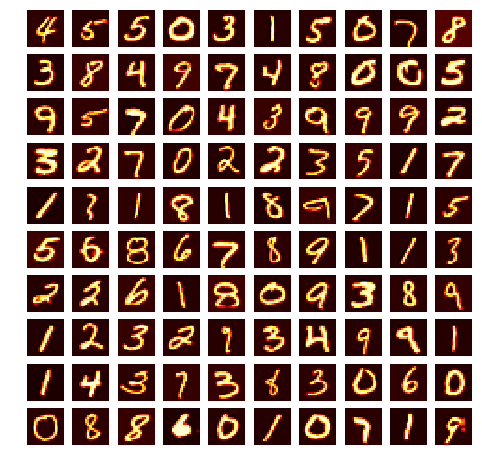

In [2]:
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(x[:, 1:][np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="hot") #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")

## The Hidden Layers of the Neural Network

This is the cell that could be expanded to account for any desired size of a neural network. The code below could be shortened even further by combining the layer calculation - it's possible to calculate the layer in one line of code.

### Forward Propogation using the Regularized Cost Function

If the regularized version of the cost function is not desired, set lambda (lmda) = 0. This will remove the regularization from the equation.

In [3]:
lmbda = 0

layer_z2 = x*Theta1.T # 5000x25, good
layer_a2 = sigmoid(layer_z2) # 5000x25, good

layer_a2 = np.append(np.ones([len(layer_a2), 1]), layer_a2, 1) # 5000x26, good

layer_z3 = layer_a2*Theta2.T # 5000x10
layer_a3 = sigmoid(layer_z3) # 5000x10

J = (1/m) * np.sum(np.sum(np.multiply((-1*yVec), np.log(layer_a3)) - \
                          np.multiply((1 - yVec), np.log(1 - layer_a3)))) \
    + lmbda/(2*m) * (np.sum(np.sum(np.power(Theta1[:, 1:], 2))) + \
                     np.sum(np.sum(np.power(Theta2[:, 1:], 2))))

print(f"Cost= {J: .4f}")

Cost=  0.2876


## Backward Propogation with Sigmoid Gradient and Gradient Checking

The cell below will conduct gradient checking. The deltas are the error associated with the layer:
* i.e. 
    * delta_3 is the error between the final predicted value and the true outcome
    * delta_2 is the error between layer 2 and layer 3
* There is no delta_1 calculated because there is no error in the intial values

In [4]:
# This computes the error between the last layer (contains prediction) and the known output 
delta_3 = layer_a3 - yVec # 5000X10

# This computes the error between layer 2 and layer 3
delta_2 = np.multiply((delta_3 * Theta2), np.append(np.ones([len(sigmoidGradient(layer_z2)), 1]), sigmoidGradient(layer_z2), 1))
delta_2 = delta_2[:, 1:] # 5000x25

Theta1_grad = (1/m) * (delta_2.T * x) + (lmbda/m) * np.append(np.zeros([len(Theta1), 1]), Theta1[:, 1:], 1)
Theta2_grad = (1/m) * (delta_3.T * layer_a2) + (lmbda/m) * np.append(np.zeros([len(Theta2), 1]), Theta2[:, 1:], 1)

Let's see how well this neural network did. One way this can be analyzed is to look at the error response.

In [5]:
prediction = layer_a3.round(0) - yVec

(np.abs(prediction.sum()) / m) * 100

4.26

There was an error of 4.26% in identifying the image. That's not bad for a 3 layer network.